In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Loan_Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum(), df.dtypes

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object)

<AxesSubplot:xlabel='Married', ylabel='count'>

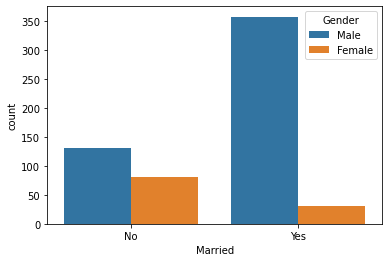

In [6]:
sns.countplot( data = df, x= 'Married' , hue = 'Gender')

In [7]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Filling null values

In [12]:
df['Gender'] = df['Gender'].fillna('Unknown')

In [13]:
df['Gender'].value_counts()

Male       489
Female     112
Unknown     13
Name: Gender, dtype: int64

In [14]:
df['Married'] = df['Married'].fillna('Unknown')
df['Married'].value_counts()

Yes        398
No         213
Unknown      3
Name: Married, dtype: int64

In [15]:
df['Self_Employed'] =  df['Self_Employed'].fillna('Unknown')
df['Self_Employed'].value_counts()

No         500
Yes         82
Unknown     32
Name: Self_Employed, dtype: int64

In [16]:
df['Dependents'] = df['Dependents'].replace({'3+' : 3})

In [17]:
df['Dependents'] = df['Dependents'].fillna(0)

In [18]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64

In [19]:
df['Credit_History'] = df['Credit_History'].fillna(2)
df['Credit_History'].value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [20]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [21]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [22]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Replacing values / converting categorical to numeric

In [23]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1, 'Unknown':2})
df['Gender'].dtype

dtype('int64')

In [24]:
df['Married'] = df['Married'].replace({'No':0, 'Yes':1, 'Unknown':2})
df['Married'].dtype

dtype('int64')

In [25]:
df['Self_Employed'] = df['Self_Employed'].replace({'No':0, 'Yes':1, 'Unknown':2})
df['Self_Employed'].dtype

dtype('int64')

In [26]:
df['Education'] = df['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
df['Education'].dtype

dtype('int64')

In [27]:
df['Loan_Status'] = df['Loan_Status'].replace ({'Y' : 1, 'N' : 0})
df['Loan_Status'].dtype

dtype('int64')

In [28]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [29]:
df['Property_Area'] = df['Property_Area'].replace({'Urban':0, 'Semiurban':1, 'Rural':2})
df['Property_Area'].dtype

dtype('int64')

In [30]:
df['Dependents'] = df['Dependents'].replace({'0':0, '1':1, '2':2})
df['Dependents'].dtype

dtype('int64')

In [31]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [32]:
df = df.drop('Loan_ID',axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


# Creating X and y and splitting data

In [40]:
X = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']
X.shape, y.shape

((614, 11), (614,))

In [43]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [49]:
y_pred = model.predict(X_test)

In [51]:
pd.DataFrame({'y test':y_test,
              'y predict':y_pred}).head(20)

,y test,y predict
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
62,0,0
539,1,1
432,1,1
367,0,0
482,1,1


In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
confusion_matrix(y_test, y_pred)

array([[15, 18],
       [ 8, 82]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.54        33
           1       0.82      0.91      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.68      0.70       123
weighted avg       0.77      0.79      0.78       123



In [59]:
# Error rate for model
(y_pred != y_test).mean()

0.21138211382113822

In [64]:
# Lets change K(n_neighbors) from 1 to 40 and find the optimal K value

error_rate = []

for i in range (1,40):
    model = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    error = (y_predict != y_test).mean()
    error_rate.append(error)
    
len(error_rate)

39

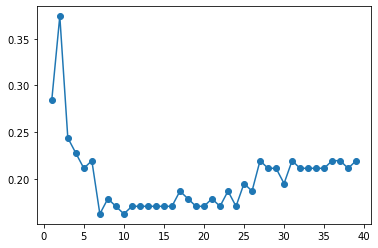

In [69]:
plt.plot(range(1,40), error_rate, marker = 'o')

In [98]:
# As we can see erro_rate has been stable after K = 5  where value ok k is 5 , therfore lets take K as 2

model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [99]:
confusion_matrix(y_test,y_predict)

array([[15, 18],
       [ 8, 82]], dtype=int64)

In [100]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.45      0.54        33
           1       0.82      0.91      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.68      0.70       123
weighted avg       0.77      0.79      0.78       123

